In [13]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

In [14]:
# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("../examples/anton_train.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("../examples/marina_train.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Anton",
    "Marina"
]

Name Anton


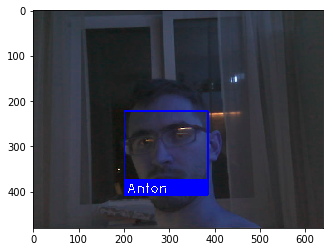

In [23]:
video_capture = cv2.VideoCapture(0)
ret, frame = video_capture.read()
# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
rgb_frame = frame[:, :, ::-1]

# Find all the faces and face enqcodings in the frame of video
face_locations = face_recognition.face_locations(rgb_frame)
face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

# Loop through each face in this frame of video
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"
    # If a match was found in known_face_encodings, just use the first one.
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]
        print("Name %s"%name)

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting image
#cv2.imshow('Video', frame)
plt.imshow(frame)

In [3]:
print(frame)

[[[ 86  79  86]
  [ 86  79  86]
  [ 86  79  86]
  ...
  [255 253 255]
  [255 253 255]
  [255 253 255]]

 [[ 86  78  88]
  [ 86  78  88]
  [ 86  78  88]
  ...
  [255 253 255]
  [255 253 255]
  [255 253 255]]

 [[ 83  78  87]
  [ 83  78  87]
  [ 83  78  87]
  ...
  [255 253 255]
  [255 253 255]
  [255 253 255]]

 ...

 [[ 97  83  84]
  [ 97  83  84]
  [100  85  83]
  ...
  [ 66  59  66]
  [ 66  59  66]
  [ 66  59  66]]

 [[ 87  76  79]
  [ 88  77  80]
  [ 88  77  80]
  ...
  [ 66  59  66]
  [ 67  59  66]
  [ 67  59  66]]

 [[ 67  59  66]
  [ 67  59  66]
  [ 70  60  66]
  ...
  [ 67  58  68]
  [ 67  58  68]
  [ 69  58  68]]]


In [7]:
kk = 0
while kk<10:
    kk = kk + 1
    
    video_capture = cv2.VideoCapture(0)
    ret, frame = video_capture.read()
    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face enqcodings in the frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    # Loop through each face in this frame of video
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name = "Unknown"

        # If a match was found in known_face_encodings, just use the first one.
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            print("Name %s"%name)

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable